# Student grades prediction


# project Description 



The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams


CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


 
Predict - CGPA of a student based on different grades in four years.


## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


 # Data cleaning

### Removing unnecessary  column


In [4]:
df.drop('Seat No.',axis=1 ,inplace=True)

In [5]:
df.shape

(571, 42)

In [6]:
# checking value counts 
for i in df.columns:
    print(df[i].value_counts())

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4


* some inconsistent grades are present in dataset lets fix it.

In [7]:
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)
df.reset_index(drop=True,inplace=True)   

In [8]:
for i in df.columns:
    print(df[i].value_counts())

A-    112
A     110
B+     58
B      56
B-     53
D      37
C      31
C+     30
D+     22
A+     22
C-     15
F       1
Name: PH-121, dtype: int64
A-    80
B-    75
C     67
B     62
B+    58
C-    48
C+    45
D     40
A     38
D+    29
A+     4
F      1
Name: HS-101, dtype: int64
A     174
A-    117
B+     49
B      46
B-     39
A+     31
D      27
C      19
C-     16
C+     15
D+     14
Name: CY-105, dtype: int64
A     95
A-    71
B+    69
B     56
D     41
B-    39
C     37
C-    36
C+    36
A+    34
D+    33
Name: HS-105/12, dtype: int64
A-    104
A      99
B-     67
B+     61
B      52
C-     36
C+     33
C      28
D      23
A+     23
D+     19
F       1
Name: MT-111, dtype: int64
A     148
A-    133
B+     59
B      47
A+     42
B-     35
C+     22
C      20
C-     20
D+     14
D       7
Name: CS-105, dtype: int64
A-    113
B+    100
B      93
A      56
B-     49
C+     40
D+     28
C-     27
D      23
C      14
A+      4
Name: CS-106, dtype: int64
A-    102
A      92
B+     65
B

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     547 non-null    object 
 1   HS-101     547 non-null    object 
 2   CY-105     547 non-null    object 
 3   HS-105/12  547 non-null    object 
 4   MT-111     546 non-null    object 
 5   CS-105     547 non-null    object 
 6   CS-106     547 non-null    object 
 7   EL-102     546 non-null    object 
 8   EE-119     545 non-null    object 
 9   ME-107     546 non-null    object 
 10  CS-107     546 non-null    object 
 11  HS-205/20  546 non-null    object 
 12  MT-222     546 non-null    object 
 13  EE-222     546 non-null    object 
 14  MT-224     546 non-null    object 
 15  CS-210     546 non-null    object 
 16  CS-211     546 non-null    object 
 17  CS-203     546 non-null    object 
 18  CS-214     546 non-null    object 
 19  EE-217     546 non-null    object 
 20  CS-212    

* many columns have null values in it. we can fix them by replacing null values with most frequent value

In [10]:
features = df.columns[:-1]

### check null values


<AxesSubplot:>

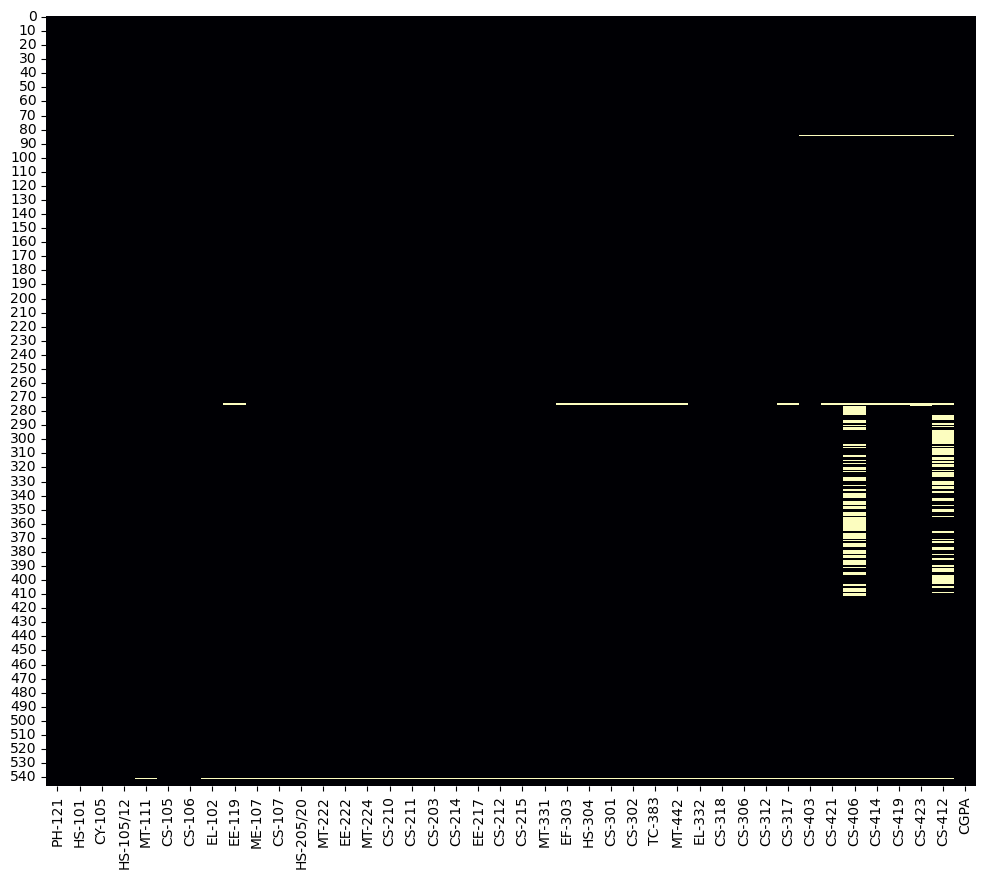

In [11]:
plt.figure(figsize= (12,10))
sns.heatmap(df.isnull(),cmap='magma',cbar=False)

In [12]:
## fixing null values

def replace_null_with_mode(data):
    # Find the mode of each column
    mode_values = data.mode().iloc[0]
    
    # Replace null values with mode
    data_filled = data.fillna(mode_values)
    
    return data_filled



* fixing the null value using most frequent grade in the dataset . it a most effective way to treat nulls in the categorical columns

In [13]:
df = replace_null_with_mode(df)

<AxesSubplot:>

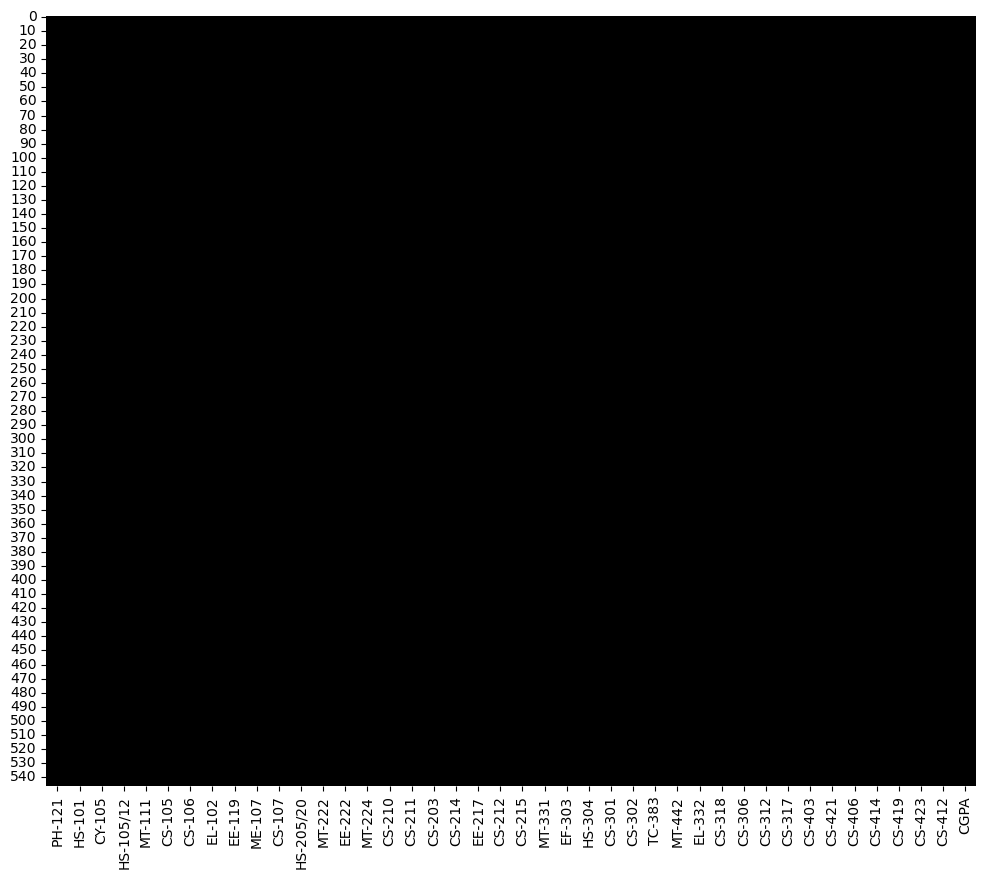

In [14]:
plt.figure(figsize= (12,10))
sns.heatmap(df.isnull(),cmap='gnuplot',cbar=False)

* now there is zero null value in the dataset

In [15]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

# Encoding the categorical values

In [16]:
for column in df.columns:
    
    df[column]=df[column].replace('A+',4.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('A-',3.7)
    df[column]=df[column].replace('B+',3.4)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('B-',2.7)
    df[column]=df[column].replace('C+',2.4)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('C-',1.7)
    df[column]=df[column].replace('D+',1.4)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

* encoding the data into numeric form according to standard grades numeric values.

##  Renaming the columns which have odd names


In [17]:
df = df.rename(columns={'HS-105/12':'HS-105','HS-205/20':'HS-205'})


## creating train test split

In [18]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['CGPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


* some columns have irrelevant name . so fixed it.

In [19]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

In [21]:
df.describe()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.067642,2.657952,3.310055,2.916636,3.047166,3.366728,3.000914,3.019927,3.060878,2.750640,...,2.976234,2.744424,3.140402,2.554662,3.373126,3.491042,3.059232,3.010603,3.342779,2.995388
std,0.936537,0.898506,0.873265,0.988782,0.896047,0.765265,0.827071,0.930312,0.797366,0.995601,...,1.012822,0.845166,0.854419,0.865577,0.704635,0.661342,0.720730,0.860316,0.682592,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.700000,2.000000,3.000000,2.000000,2.400000,3.000000,2.700000,2.400000,2.550000,2.000000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.400000,2.700000,2.400000,3.000000,2.587500
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,3.000000,...,3.400000,2.700000,3.400000,2.700000,3.700000,3.700000,3.000000,3.400000,3.700000,3.058000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.474000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


<AxesSubplot:>

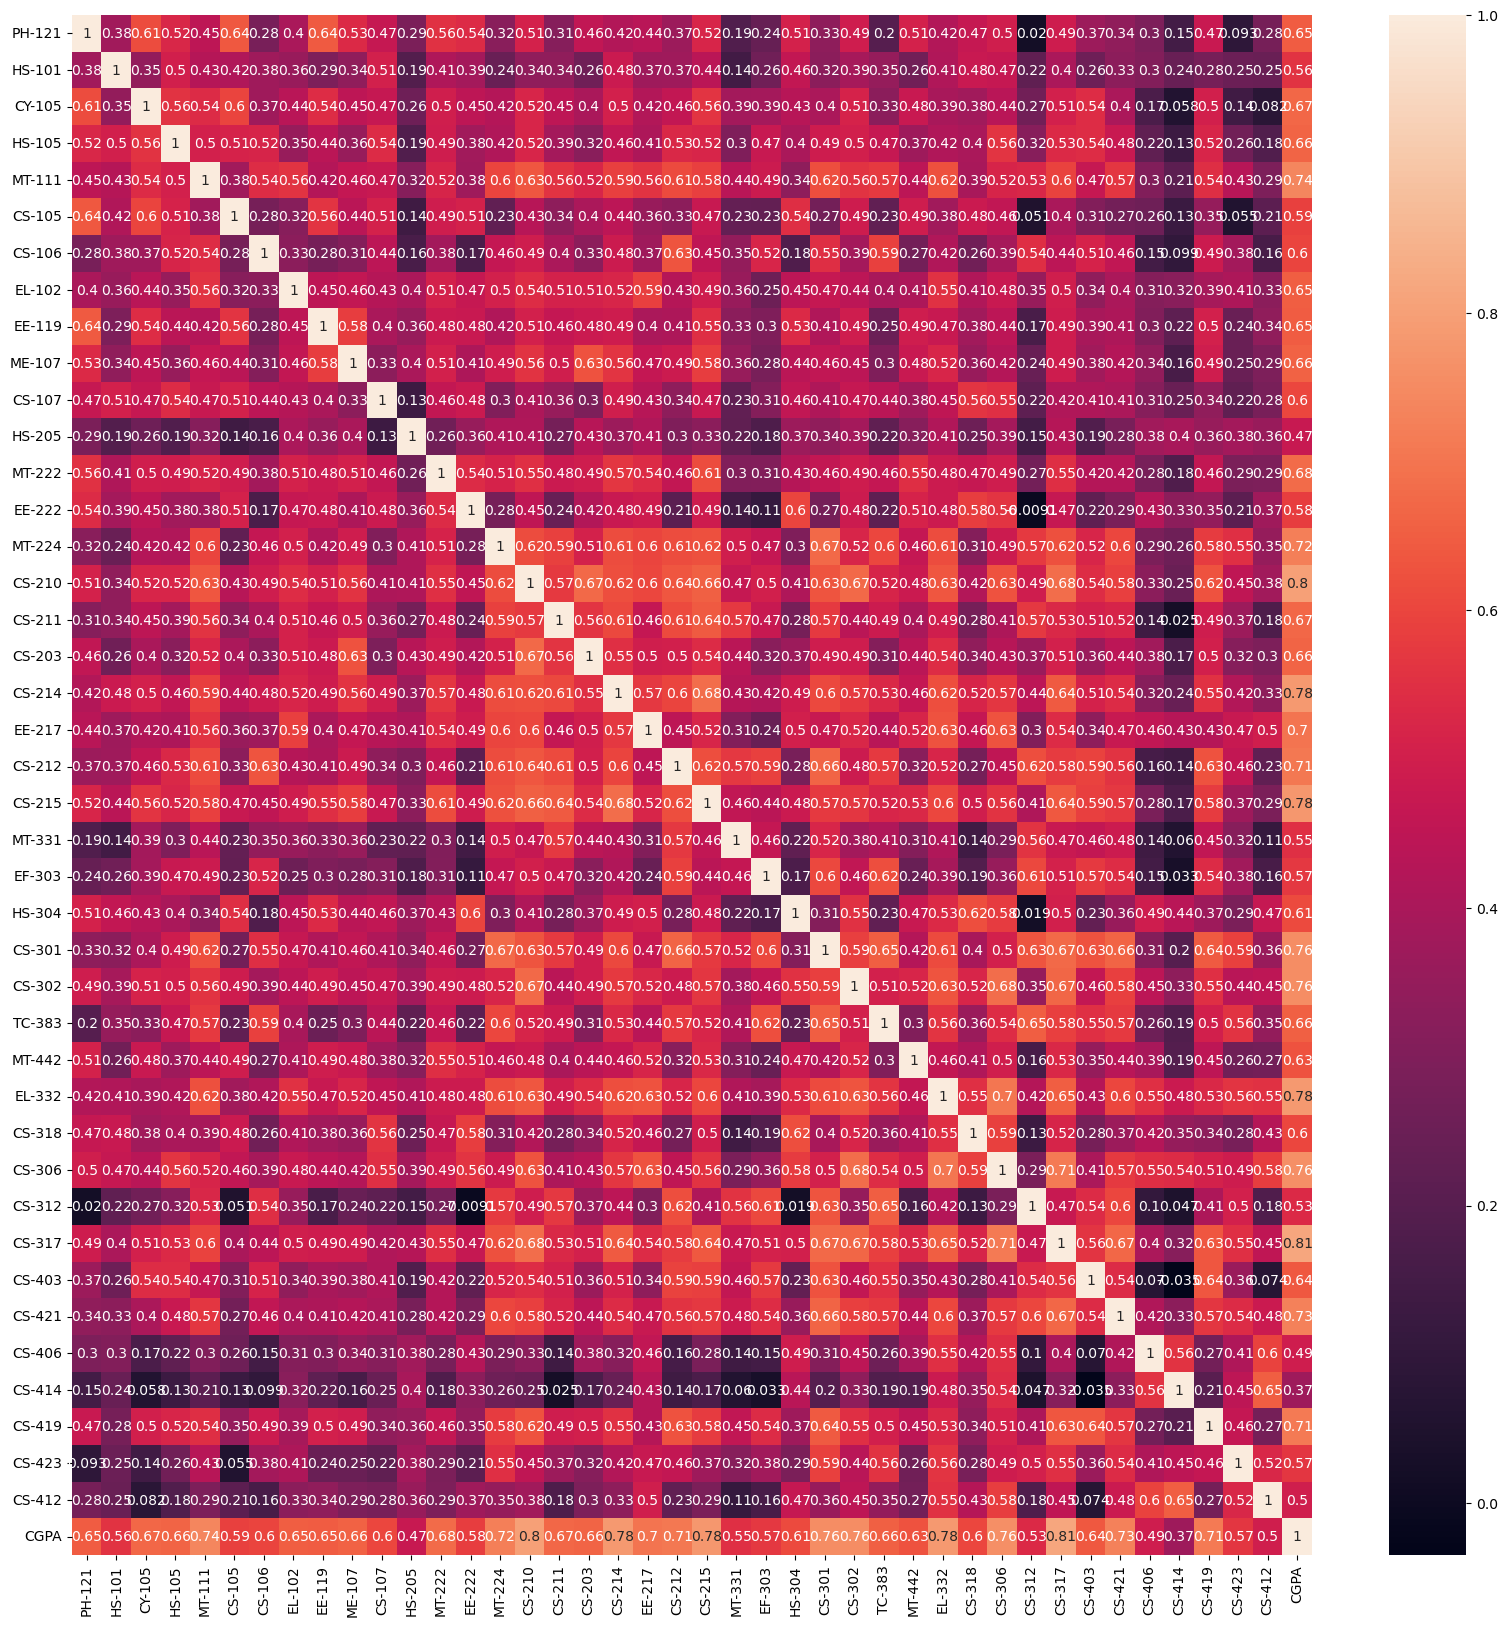

In [22]:
# vasualization of correlation metrix

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cbar='qqplot')

## Training the Model

In [23]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(n_splits=5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=cv, scoring='r2').mean())


In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train)

In [25]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,0.154767,0.934702
1,Ridge Regression,0.154161,0.935296
2,Lasso Regression,0.576583,-0.016111
3,K Neighbors Regressor,0.166763,0.923116
4,Decision Tree Regressor,0.286685,0.754212
5,Random Forest Regressor,0.183150,0.908230
6,Gradient Boosting Regressor,0.175026,0.916477
7,Adaboost Regressor,0.209015,0.875643


* out of all the model the linear regression have best preformance . so we will tune the model to get more good prefromance.

In [26]:
#tuning this base model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming you have input features X and target variable y

# Step 1: Create a pipeline with preprocessing steps (e.g., feature scaling)
pipeline = Pipeline([
    
    ('regressor', LinearRegression())  # Linear regression model
])

# Step 2: Define the hyperparameter grid to search over
param_grid = {
    'regressor__fit_intercept': [True, False],  # Whether to fit an intercept term
    'regressor__normalize': [True, False]  # Whether to normalize the input features
}

# Step 3: Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Step 4: Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 5: Evaluate the model on test data (assuming you have test data X_test and y_test)
mse = mean_squared_error(y_test, best_model.predict(X_test))
rmse = np.sqrt(mse)

# Step 6: Print the results
print("Best hyperparameters:", best_params)
print("Root Mean Squared Error:", rmse)


Best hyperparameters: {'regressor__fit_intercept': False, 'regressor__normalize': True}
Root Mean Squared Error: 0.05662585008540109


In [27]:

# Step 1: Create a linear regression model
linear_regression = LinearRegression(fit_intercept=False,normalize=True)

# Step 3: Calculate R-squared using cross-validation
cv = 5  # Number of cross-validation folds
r_squared = cross_val_score(linear_regression, X_train,y_train, cv=cv, scoring='r2').mean()

# Step 4: Print the R-squared score
print("R Squared:", r_squared)

R Squared: 0.9353267376886238


In [28]:
#applying this model on test data

linear_regression = LinearRegression(fit_intercept=False,normalize=True).fit(X_train, y_train)
pred = linear_regression.predict(X_test)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, linear_regression.predict(X_test))))
print("Test R^2: ", r2_score(y_test, linear_regression.predict(X_test)))

Test RMSE:  0.0798835389972638
Test R^2:  0.9829178998984393


* the best perfromance of the linear regression after hyperparameter tunning is 98%.

In [31]:
# Create a DataFrame with predicted and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

# Display the comparison DataFrame
comparison_df.head()


,Actual,Predicted
176,3.736,3.735143
77,3.647,3.695478
361,3.707,3.725716
90,3.861,3.841739
368,3.621,3.571792


* model performance is pretty good . the prediction and the actual value have not much difference . so the model is performing well.

In [33]:
import pickle


In [34]:
with open('modelpickle','wb') as f:
    pickle.dump(linear_regression,f)
    

In [36]:
with open('modelpickle','rb') as f:
    mp = pickle.load(f)

In [37]:
mp.predict(X_test)

array([3.73514295, 3.69547849, 3.72571587, 3.84173891, 3.57179172,
       3.08377226, 2.39939121, 2.52857825, 3.72864334, 2.40774874,
       2.90060597, 3.67884621, 3.20901512, 2.37973818, 2.55495639,
       3.59889916, 2.72996804, 3.3816891 , 2.40693081, 1.90679684,
       3.22756664, 2.18010205, 2.58971325, 2.77828361, 3.30815609,
       3.56398651, 2.5345802 , 2.60128759, 2.74929529, 3.24505333,
       3.41348707, 2.82738593, 2.08380609, 3.25522355, 2.70961236,
       3.11184251, 1.88597196, 3.48915884, 3.35837906, 3.89393784,
       2.98725933, 2.78814466, 3.2386767 , 3.06028957, 2.49625539,
       3.03143751, 2.01983328, 1.83635861, 3.73830182, 3.77524438,
       3.56409943, 3.93702959, 2.28834857, 2.90206841, 2.0954171 ,
       2.34308227, 3.17541995, 3.11835849, 2.6127449 , 3.19171877,
       2.50531228, 3.04856234, 2.85539881, 3.73737353, 3.80688064,
       1.4761405 , 2.69484296, 2.01794539, 3.49077932, 2.79425417,
       2.44161105, 2.71394325, 2.2618772 , 3.00636132, 3.80734